As always [mentioned first](http://lilithelina.tumblr.com/post/128638794919/choice-of-language), I want to compare `Python` and `R` analysis steps in the [DataManViz](http://lilithelina.tumblr.com/tagged/DataManViz), [DataAnaT](http://lilithelina.tumblr.com/tagged/DataAnaT), and [RegModPrac](http://lilithelina.tumblr.com/RegModPrac) courses and the **BCCIU** (Breast Cancer Causes Internet Usage) [project](http://lilithelina.tumblr.com/BCCIUoverview).
Therefore, this is the `R` version of the [Polynomial Regression](http://lilithelina.tumblr.com/post/148732068839/polynomial-regression-python) `Python` script I posted before.  
While I used multiple linear regression to test the association between internet use rate (one of my response variables) and multiple explanatory variables (mainly breast cancer) in the first part of week three of the course, I will now apply polynomial regression to the association between female employment rate and breast cancer. I have already seen (for example when using [basic linear regression](http://lilithelina.tumblr.com/post/147586176199/basic-linear-regression-r)) that there is no linear relationship between these two variables, but there does seem to be a curve that will now be explored further.

Again, the whole thing will look better over [here](http://htmlpreview.github.io/?https://github.com/LilithElina/Data-Analysis-and-Interpretation/blob/master/RegModPrac/Week_Three_PolynomialRegression.html).

I will first run some of my previous code to prepare R, and remove variables I don't need and observations for which important data is missing.

In [1]:
#setwd("C:/Users/nolah_000/Dropbox/coursera/Data Analysis and Interpretation/RegModPrac")
#setwd("C:/Users/Sarah/Dropbox/coursera/Data Analysis and Interpretation/RegModPrac")
setwd("C:/Users/spo12/Dropbox/coursera/Data Analysis and Interpretation/RegModPrac")
options(stringsAsFactors=FALSE)

# load libraries
library(repr) # for smaller plots
suppressMessages(library(ggplot2)) # for plotting
suppressMessages(library(gridExtra))  # for plotting ggplots side by side
library(car) # for diagnostics

# load data
gapminder <- read.table("../gapminder.csv", sep=",", header=TRUE, quote="\"")
# set row names
rownames(gapminder) <- gapminder$country

# subset data
sub_data <- subset(gapminder, select=c("femaleemployrate", "breastcancerper100th", "incomeperperson"))

# remove rows with NAs
sub_data2 <- na.omit(sub_data)

The explanatory variable breast cancer (and the second variable for use later, income per person) should be mean centred for easier interpretation. The `scale()` function in `R` is a bit more comfortable to use for this than the manual process we used in `Python`.

In [2]:
# centre breast cancer and income data
sub_data2$breastCentre <- scale(sub_data2$breastcancerper100th, scale=FALSE)
sub_data2$incomeCentre <- scale(sub_data2$incomeperperson, scale=FALSE)
summary(sub_data2)

 femaleemployrate breastcancerper100th incomeperperson     breastCentre.V1  
 Min.   :12.40    Min.   :  3.90       Min.   :  103.8   Min.   :-33.94753  
 1st Qu.:38.90    1st Qu.: 20.73       1st Qu.:  609.4   1st Qu.:-17.12253  
 Median :48.20    Median : 30.15       Median : 2453.6   Median : -7.69753  
 Mean   :47.88    Mean   : 37.85       Mean   : 7336.3   Mean   :  0.00000  
 3rd Qu.:56.15    3rd Qu.: 50.38       3rd Qu.: 8993.4   3rd Qu.: 12.52747  
 Max.   :83.30    Max.   :101.10       Max.   :52301.6   Max.   : 63.25247  
  incomeCentre.V1  
 Min.   :-7232.56  
 1st Qu.:-6726.90  
 Median :-4882.74  
 Mean   :    0.00  
 3rd Qu.: 1657.04  
 Max.   :44965.25  

`R`'s `summary()` function has less problems with floats than `Python`'s `describe()`, so the means of the centred variables are displayed as zeroes here. A bit annoying, though, is the ".V1" notation behind the column names I chose. This is a relic from the `scale()` function and I don't know how to avoid it. Interestingly, this addition is not shown when I simply print the column names of my data. If someone can explain that, please enlighten me.

Let's start off once more with the basic linear model, to have something to compare the polynomial model to.

In [3]:
fit1 <- lm(femaleemployrate ~ breastCentre, data=sub_data2)
summary(fit1)


Call:
lm(formula = femaleemployrate ~ breastCentre, data = sub_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.752  -9.360   0.640   8.711  34.604 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  47.87716    1.16039  41.259   <2e-16 ***
breastCentre -0.04464    0.05025  -0.888    0.376    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.77 on 160 degrees of freedom
Multiple R-squared:  0.004909,	Adjusted R-squared:  -0.001311 
F-statistic: 0.7892 on 1 and 160 DF,  p-value: 0.3757


As before, in the [Python](http://lilithelina.tumblr.com/post/148732068839/polynomial-regression-python) script as well as [previous analyses](http://lilithelina.tumblr.com/post/147586176199/basic-linear-regression-r), the linear model shows that there is no statistically significant (linear) association between the female employment rate of 2007 and new breast cancer cases registered in 2002. The coefficient of correlation is very low, indicating that the breast cancer variable cannot explain variability in female employment. The coefficient for breast cancer is also very low, which would be fine, but it comes with a high *p*-value.

Now I can calculate a polynomial regression model by adding a squared breast cancer variable to my basic linear model. This works similarly to what I did in `Python`, since `R` also has an identity function, which is called *AsIs*. The function (to inhibit the interpretation of an object) and the function call (`I()`) are the same as in `Python`, though.

In [4]:
fit2 <- lm(femaleemployrate ~ breastCentre + I(breastCentre^2), data=sub_data2)
summary(fit2)


Call:
lm(formula = femaleemployrate ~ breastCentre + I(breastCentre^2), 
    data = sub_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.467  -8.516   0.767   8.389  32.558 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       42.949267   1.537349  27.937  < 2e-16 ***
breastCentre      -0.255227   0.066140  -3.859 0.000165 ***
I(breastCentre^2)  0.009240   0.002024   4.565 9.96e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.93 on 159 degrees of freedom
Multiple R-squared:  0.1202,	Adjusted R-squared:  0.1091 
F-statistic: 10.86 on 2 and 159 DF,  p-value: 3.788e-05


Similar to `Python`, adding this polynomial term highly improved the significance rating of the coefficients, and also increased the $r²$. Nevertheless, the variability in breast cancer still explains only around 12% of the variability in female employment. This is not nearly as good as I got with internet usage and breast cancer.

It's time to visualise this association once more, and then consider what else can be done to improve the model.

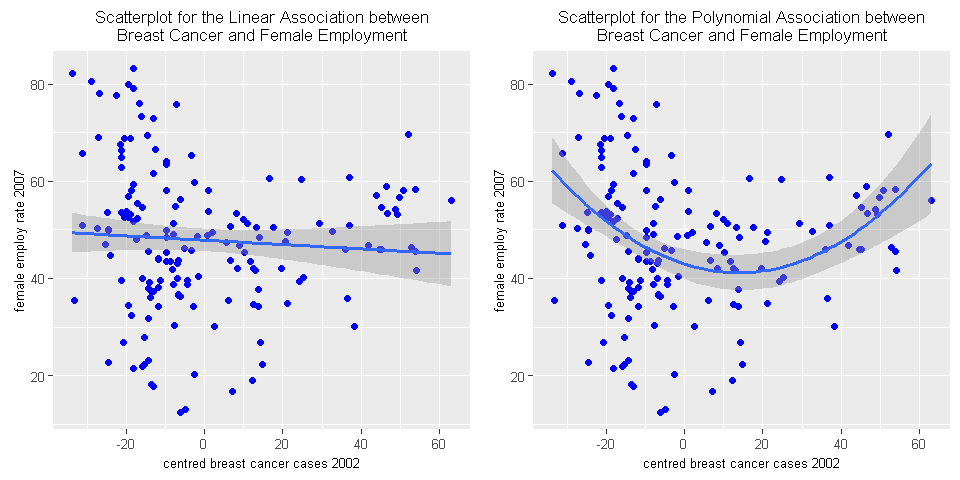

In [5]:
# set plot sizes
options(repr.plot.width=8, repr.plot.height=4)

# scatterplot for breast cancer versus female employment
# with linear regression line
linear <- ggplot(sub_data2, aes(x=breastCentre, y=femaleemployrate)) + geom_point(colour="blue") + 
geom_smooth(method=lm) + xlab("centred breast cancer cases 2002") + ylab("female employ rate 2007") + 
ggtitle("Scatterplot for the Linear Association between\nBreast Cancer and Female Employment") + 
theme(plot.title=element_text(size=10), axis.text=element_text(size=8),
      axis.title.x=element_text(size=8), axis.title.y=element_text(size=8))

# scatterplot for breast cancer versus female employment
# with second order polynomial regression line
polynom <- ggplot(sub_data2, aes(x=breastCentre, y=femaleemployrate)) + geom_point(colour="blue") +
geom_smooth(method=lm, formula=y ~ x + I(x^2)) + xlab("centred breast cancer cases 2002") + ylab("female employ rate 2007") +
ggtitle("Scatterplot for the Polynomial Association between\nBreast Cancer and Female Employment") + 
theme(plot.title=element_text(size=10), axis.text=element_text(size=8),
      axis.title.x=element_text(size=8), axis.title.y=element_text(size=8))

grid.arrange(linear, polynom, ncol=2)

The graphs nicely show the convex curve in the data that makes the polynomial regression model a better fit than the linear one. Nevertheless, the countries with fewer breast cancer cases than the mean are still widely distributed and don't follow the curve as well as those with a higher number of breast cancer cases. This doesn't look like it can be resolved with the addition of another polynomial. In fact, I doubt that this can be resolved at all. The data set contains more countries with a breast cancer prevalence lower than the mean than countries with higher numbers (since this is the mean, and not the median, this is absolutely possible, and it means that there are few countries with very high numbers causing the high mean value). In the countries with fewer breast cancer cases, female employment rates can be anything from really low to really high.

<!--- Tips for selecting the best regression model: http://blog.minitab.com/blog/adventures-in-statistics/how-to-choose-the-best-regression-model --->

So, what have I learned so far about the relationship between breast cancer and female employment, based on the [Gapminder](https://www.gapminder.org/) data set?
- Based on the [visualisations](http://lilithelina.tumblr.com/post/130899449414/data-visualisation-python) I did of my three variables of interest, female employment was the only variable that displayed a normal (bell-shaped) distribution.
- [Also](http://lilithelina.tumblr.com/post/131697215314/more-data-visualisation-python), countries with low breast cancer prevalence can apparently have any female employment rate from the spectrum.
- When using breast cancer quartiles and looking at female employment rates inside those quartiles, there is a significant difference between the female employment rates in countries with low breast cancer prevalence and all other countries, according to [ANOVA](http://lilithelina.tumblr.com/post/132593030304/data-analysis-anova-python), though.
- Most countries with high female employment rates have low breast cancer prevalence, and a [Chi-squared](http://lilithelina.tumblr.com/post/133785457799/data-analysis-chi-square-python) test again revealed a statistically significant difference in female employment between countries with low breast cancer prevalence and all other countries.
- [Pearson correlation](http://lilithelina.tumblr.com/post/135265946959/data-analysis-pearson-correlation-python) and [basic linear regression](http://lilithelina.tumblr.com/post/147441369709/basic-linear-regression-python) both showed that there is no linear relationship between female employment and breast cancer, as the variance within the variables is almost as high as the variance between them.
- When using income per person as [moderator](http://lilithelina.tumblr.com/post/143790528809/data-analysis-moderators-python) on the Pearson correlation analysis, a weak *negative* correlation between breast cancer and female employment can be detected in low income countries, while  there is a weak *positive* correlation in high income countries.

I wonder whether it would help to take the income per person into account in the regression analysis as well.

In [6]:
fit3 <- lm(femaleemployrate ~ breastCentre + I(breastCentre^2) + incomeCentre, data=sub_data2)
summary(fit3)


Call:
lm(formula = femaleemployrate ~ breastCentre + I(breastCentre^2) + 
    incomeCentre, data = sub_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.521  -8.535   0.741   8.364  32.522 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.291e+01  1.583e+00  27.103  < 2e-16 ***
breastCentre      -2.511e-01  7.657e-02  -3.279  0.00128 ** 
I(breastCentre^2)  9.312e-03  2.139e-03   4.354 2.39e-05 ***
incomeCentre      -1.742e-05  1.618e-04  -0.108  0.91438    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.97 on 158 degrees of freedom
Multiple R-squared:  0.1203,	Adjusted R-squared:  0.1036 
F-statistic:   7.2 on 3 and 158 DF,  p-value: 0.0001465


In [7]:
fit4 <- lm(femaleemployrate ~ breastCentre + incomeCentre, data=sub_data2)
summary(fit4)


Call:
lm(formula = femaleemployrate ~ breastCentre + incomeCentre, 
    data = sub_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.821  -9.503   0.904   8.207  34.838 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  47.8771604  1.1582857  41.335   <2e-16 ***
breastCentre -0.1120919  0.0734212  -1.527    0.129    
incomeCentre  0.0002038  0.0001620   1.258    0.210    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.74 on 159 degrees of freedom
Multiple R-squared:  0.01472,	Adjusted R-squared:  0.002322 
F-statistic: 1.187 on 2 and 159 DF,  p-value: 0.3077


Adding income per person as another variable into the regression models did not improve them, and there is no significant relationship between female employment and income.

The influence of income on the relationship between breast cancer and female employment was never very strong, and was only picked up by the Pearson correlation when using income quartiles to group the other data by. It could clearly be seen in the [regression lines](http://67.media.tumblr.com/b9af0d3d6a5233a208f77258cfb474b9/tumblr_o6lsgboahI1ufa1d3o4_1280.png) based on these quartiles that countries with low income (25%tile) also showed low breast cancer prevalence with higher female employment rates (which decreased when breast cancer prevalence increased). In countries with high income (100%tile), more breast cancer cases were detected while less women were employed, but both variables increased together. Since there seems to be a rather linear relationship between breast cancer and income per person, splitting the data by income would, of course, make the convex relationship between breast cancer and female employment more clear.